# Visualizando Gráficos com Matplotlib e Pyplot

Dados para os exemplos

In [70]:
import pandas as pd

df = pd.DataFrame({
    'nome':['joão','maria','pedro','jefferson','william','marina','jose'],
    'idade':[23,78,22,19,45,33,20],
    'gênero':['M','F','M','M','M','F','M'],
    'estado':['são paulo','rio de janeiro','santa catarina','são paulo','pernambuco','pará','pará'],
    'numero_criancas':[2,0,0,3,2,1,4],
    'numero_pets':[5,1,0,5,2,2,3]
})

In [71]:
df

,nome,idade,gênero,estado,numero_criancas,numero_pets
0,joão,23,M,são paulo,2,5
1,maria,78,F,rio de janeiro,0,1
2,pedro,22,M,santa catarina,0,0
3,jefferson,19,M,são paulo,3,5
4,william,45,M,pernambuco,2,2
5,marina,33,F,pará,1,2
6,jose,20,M,pará,4,3


Pandas é capaz de integrar-se facilmente com a biblioteca matplotlib.

Podemos plotar diretamente do DataFrame utilizando o método **plot()**.

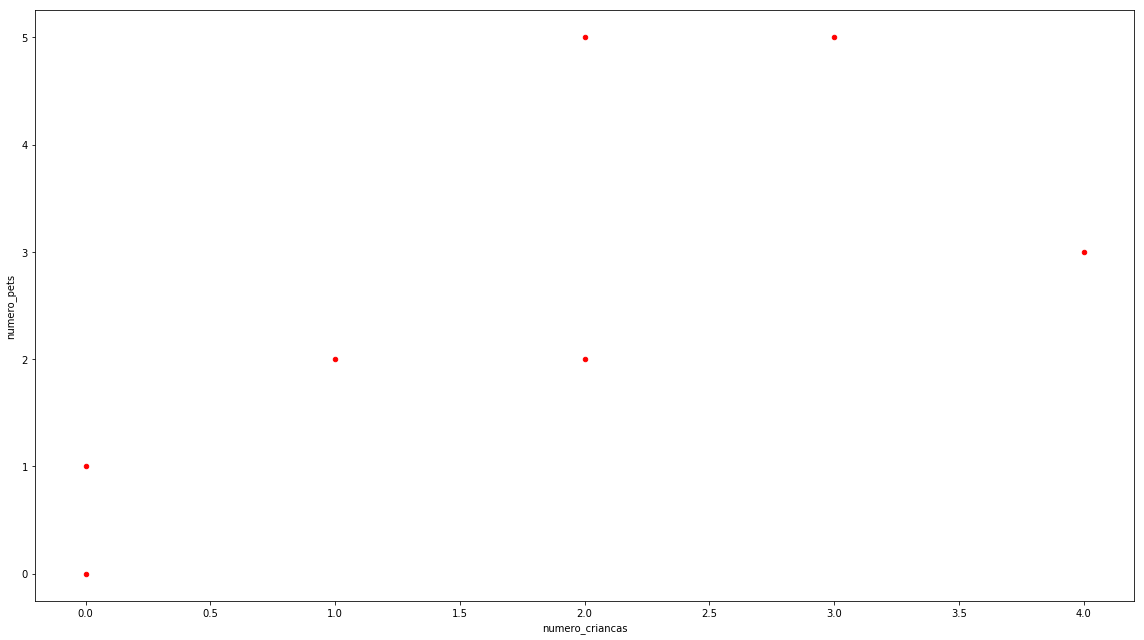

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

# Um gráfico de dispersão comparando o número de crianças e o número de pets
df.plot(kind='scatter',x='numero_criancas',y='numero_pets',color='red')
plt.show()

Podemos plotar os valores das colunas utilizando gráfico de barras

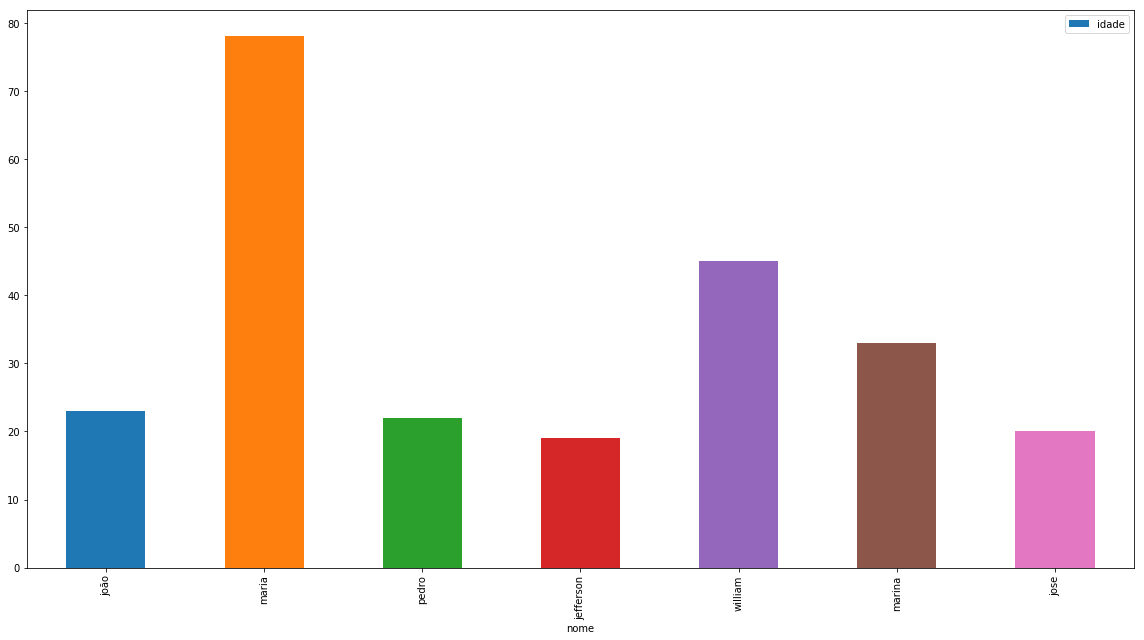

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

# a simple line plot
df.plot(kind='bar',x='nome',y='idade')

Podemos utilizar gráficos de linha com múltiplas colunas

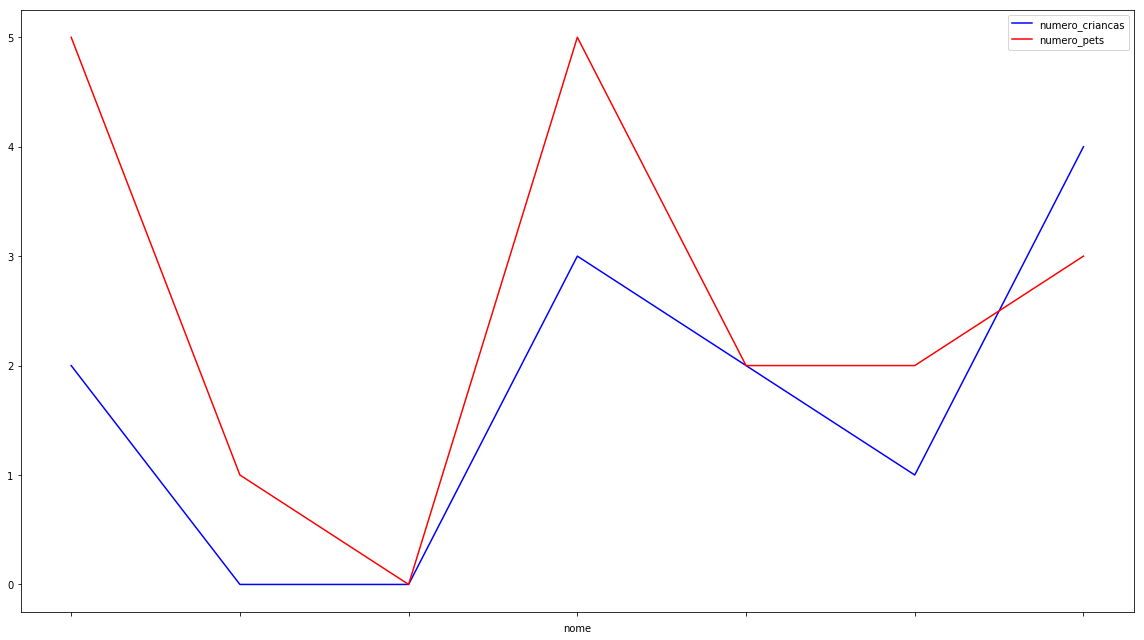

In [81]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

# gca significa 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='nome',y='numero_criancas',color='blue',ax=ax)
df.plot(kind='line',x='nome',y='numero_pets',color='red',ax=ax)

plt.show()

### Salvar o gráfico em um arquivo

Em vez de chamarmos **plt.show()**, chamamos **plt.savefig('nome_do_arquivo.png')**

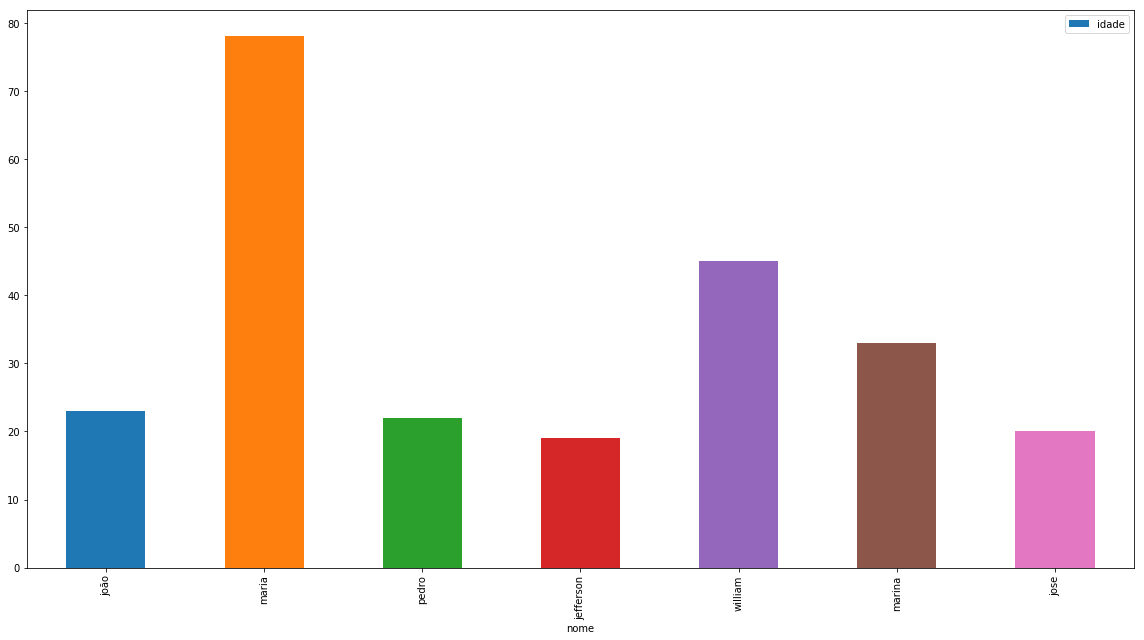

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

df.plot(kind='bar',x='nome',y='idade')

# o gráfico é salvo como o arquivo grafico.png
plt.savefig('grafico.png')

### Gráfico de barras com agrupamento

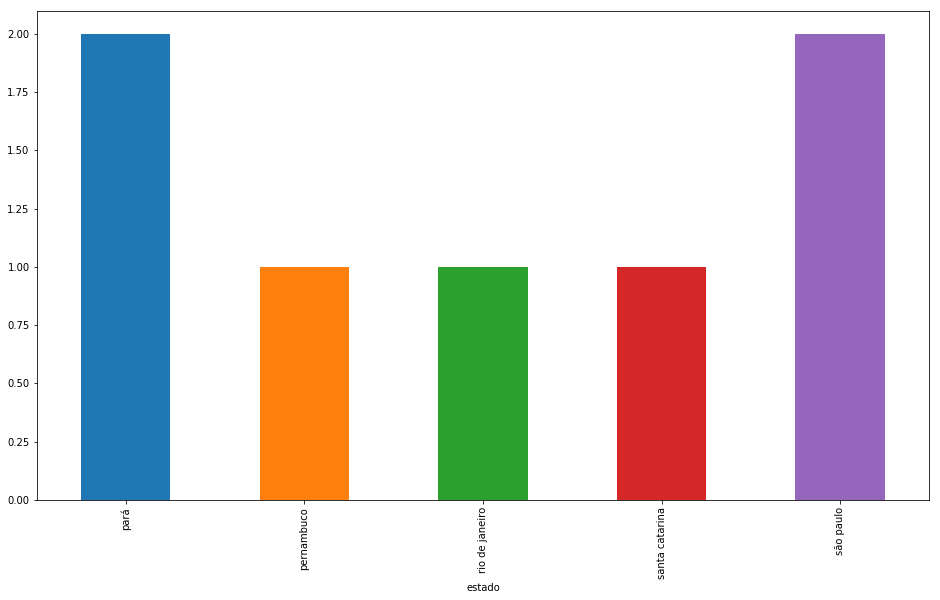

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

df.groupby('estado')['nome'].nunique().plot(kind='bar')
plt.show()

### Gráfico de barras empilhadas com agrupamento e contagem de percentagem

Para isso chamaremos o método **groupby()** e **unstack()**

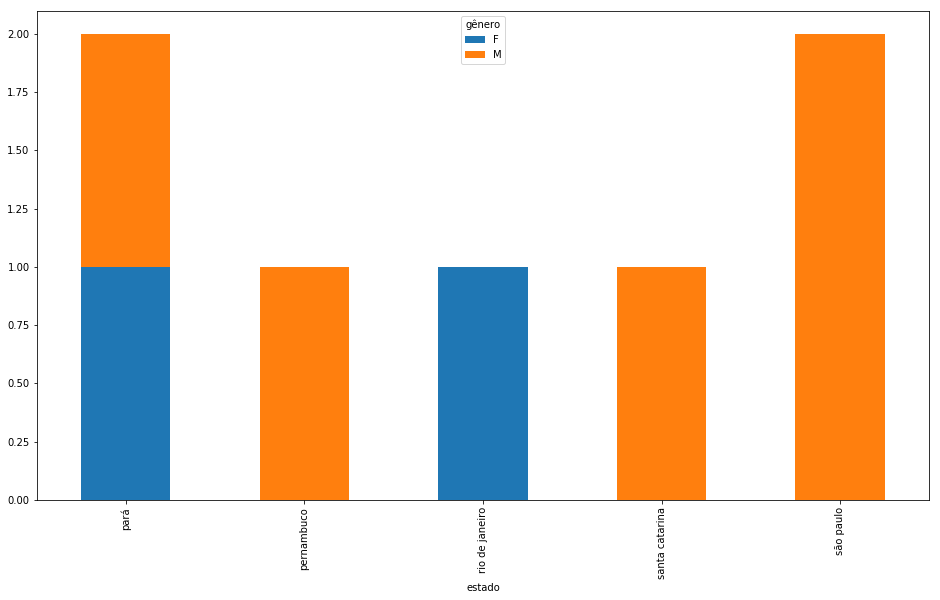

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

df.groupby(['estado','gênero'])['nome'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

Outro exemplo:

Contagem de pessoas por gênero, dividindo por estados

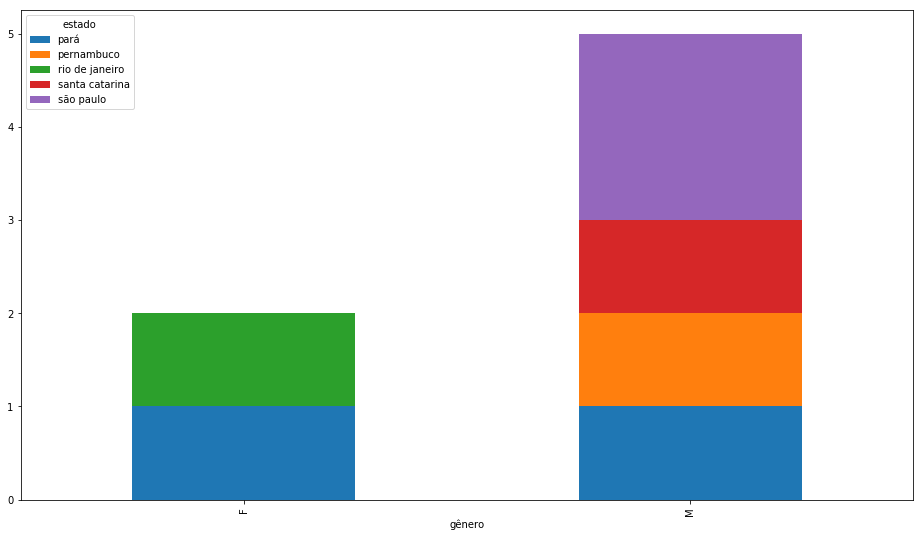

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

df.groupby(['gênero','estado'])['idade'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

### Gráfico de barras empilhadas com dois níveis de agrupamento, percentagens normalizadas para 100%

As vezes estamos apenas interessados na distribuição, não em quantidades brutas

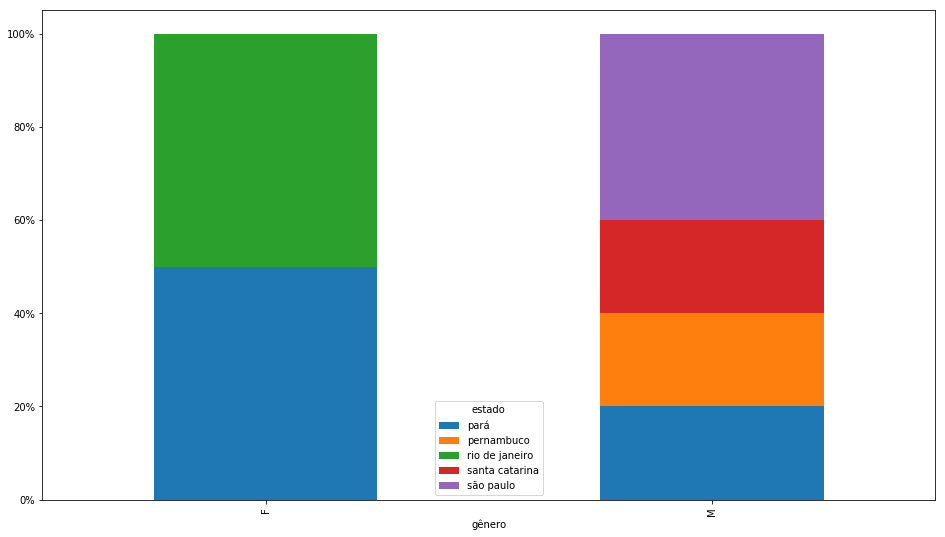

In [62]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

df.groupby(['gênero','estado']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Gráfico de barras empilhadas com apenas um agrupamento, percentagens normalizadas em 100%

Se você deseja plotar um contador de percentagem para valores com um único agrupamento, é necessário:

- Criar uma variável auxiliar e fazer um agrupamento de dois níveis baseado nela
- Corrigir o rótulo do eixo e a legenda

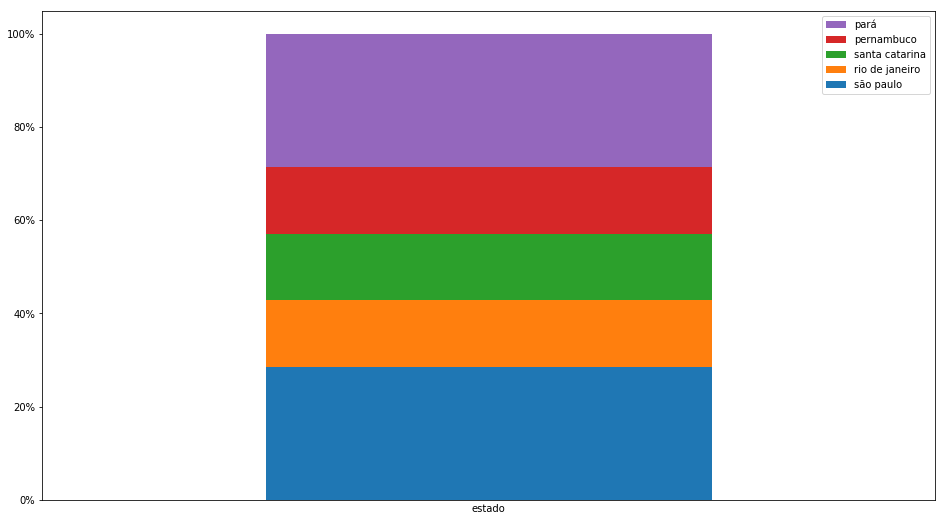

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = [16,9]

# Criar uma variável auxiliar e agrupa por ela
# Colocar a legenda como false para corrigirmos depois

df.assign(
 auxiliar = 1   
).groupby(['auxiliar','estado']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# necessário alterar para estado, caso contrário aparecerá como auxiliar
plt.xlabel('estado')

# desabilitar ticks no eixo x
plt.xticks([])

# corrigir a legenda para não incluir a variável auxiliar
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['estado'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Visualizando um gráfico histograma de valores de coluna

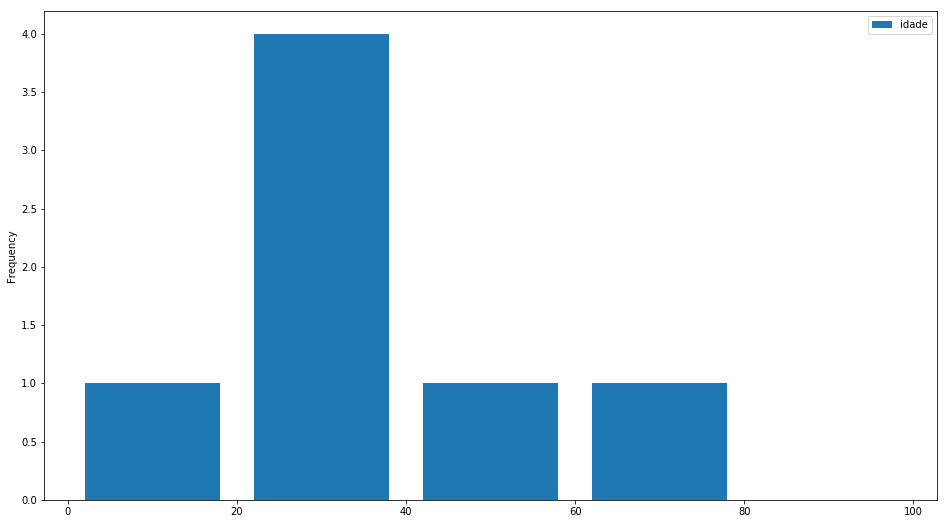

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [16,9]

df[['idade']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

### Histograma de Datas

Para plotarmos um histograma de datas, é necessário primeiro fazermos a conversão da coluna de data para **datetime** utilizando o método **pandas.datetime()**

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'name':[
        'joão','maria','pedro','jefferson','marina','jose'
    ],
    'data_de_nascimento':[
        '06/22/1978','04/05/1966','05/25/1987','03/10/1979','03/30/1965','06/12/1980'
    ]
})
df

,name,data_de_nascimento
0,joão,06/22/1978
1,maria,04/05/1966
2,pedro,05/25/1987
3,jefferson,03/10/1979
4,marina,03/30/1965
5,jose,06/12/1980


As datas foram adicionadas como strings no formato Americano

Agora podemos converter a coluna data para o tipo **datetime** e usar **plot(kind='hist')**

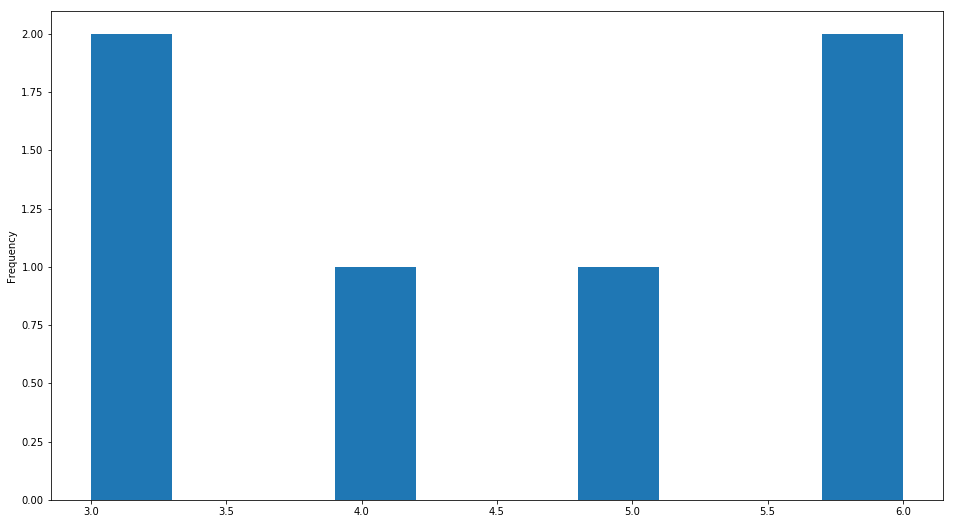

In [66]:
df['data_de_nascimento'] = pd.to_datetime(df['data_de_nascimento'],infer_datetime_format=True)

fig, ax = plt.subplots()
fig.set_tight_layout(False)

plt.clf()
df['data_de_nascimento'].map(lambda d: d.month).plot(kind='hist')
plt.show()

Como podemos ver, nós é mostrado a relação entre o mês e a frequência de pessoas que nasceram nele.